In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [54]:
df = pd.read_csv('cleaned_crime_data (1).csv')

In [55]:
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])
df['Date Rptd'] =pd.to_datetime(df['Date Rptd'])

In [56]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'LOCATION',
       'LAT', 'LON', 'year', 'month', 'day', 'day_of_week', 'day_name',
       'month_name', 'hour', 'minute', 'time_category', 'season', 'age_group',
       'is_used_weapon', 'is_human_victim', 'TIME_OCC_PAD', 'Mocodes_Count',
       'area_risk_level', 'area_risk_level_numeric', 'area_risk_score'],
      dtype='object')

In [57]:
df.describe()

,DR_NO,Date Rptd,DATE OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,...,day,day_of_week,hour,minute,is_used_weapon,is_human_victim,TIME_OCC_PAD,Mocodes_Count,area_risk_level_numeric,area_risk_score
count,2.002510e+05,200251,200251,200251.000000,200251.000000,200251.000000,200251.000000,200251.000000,200251.000000,200251.000000,...,200251.000000,200251.000000,200251.000000,200251.000000,200251.000000,200251.000000,200251.000000,200251.000000,200251.000000,200251.000000
mean,2.202811e+08,2022-05-28 05:16:03.896310528,2022-05-16 03:31:23.154640640,10.691432,1115.589116,1.399818,6.129709,29.245777,5.437521,5.815979,...,15.346126,3.025713,13.231145,17.846932,0.381296,0.404552,1340.961423,1.181607,2.606589,63.514137
min,1.901011e+08,2020-01-01 00:00:00,2020-01-01 00:00:00,1.000000,101.000000,1.000000,4.709530,-1.000000,4.624973,4.657010,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,44.770901
25%,2.106180e+08,2021-04-22 00:00:00,2021-04-07 00:00:00,5.000000,587.000000,1.000000,5.805135,5.000000,4.624973,4.807338,...,8.000000,1.000000,9.000000,0.000000,0.000000,0.000000,900.000000,0.693147,2.000000,57.677447
50%,2.210041e+08,2022-06-10 00:00:00,2022-05-30 00:00:00,11.000000,1139.000000,1.000000,6.093570,30.000000,5.318120,4.807338,...,15.000000,3.000000,14.000000,15.000000,0.000000,0.000000,1420.000000,1.386294,3.000000,61.277755
75%,2.311126e+08,2023-07-07 00:00:00,2023-06-25 00:00:00,16.000000,1613.000000,2.000000,6.440947,44.000000,6.218600,7.368063,...,23.000000,5.000000,19.000000,30.000000,1.000000,1.000000,1900.000000,1.609438,4.000000,66.039073
max,2.521041e+08,2025-03-28 00:00:00,2025-03-27 00:00:00,21.000000,2199.000000,2.000000,6.863803,99.000000,6.879356,9.999667,...,31.000000,6.000000,23.000000,59.000000,1.000000,1.000000,2359.000000,2.397895,4.000000,88.532526
std,1.321341e+07,NaN,NaN,6.110846,611.224779,0.489862,0.423845,21.944246,0.773849,1.552472,...,8.944671,1.988673,6.502459,18.170646,0.485706,0.490806,650.240308,0.653222,1.141818,9.872920


In [58]:
df=df.drop(columns=['DATE OCC','Date Rptd','TIME OCC','AREA', 'AREA NAME', 'LAT', 'LON'])

In [59]:
cat_columns = df.select_dtypes(include='object').columns
num_columns = df.select_dtypes(exclude='object').columns
print(f'cat columns {cat_columns.tolist()}')
print(f'num columns {num_columns.tolist()}')

cat columns ['Crm Cd Desc', 'Mocodes', 'Vict Sex', 'Vict Descent', 'Premis Desc', 'Weapon Desc', 'Status', 'Status Desc', 'LOCATION', 'day_name', 'month_name', 'time_category', 'season', 'age_group', 'area_risk_level']
num columns ['DR_NO', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Vict Age', 'Premis Cd', 'Weapon Used Cd', 'year', 'month', 'day', 'day_of_week', 'hour', 'minute', 'is_used_weapon', 'is_human_victim', 'TIME_OCC_PAD', 'Mocodes_Count', 'area_risk_level_numeric', 'area_risk_score']


In [60]:
num_columns=num_columns.delete([len(num_columns)-2,len(num_columns)-1])

In [61]:
cat_columns=cat_columns.delete([len(cat_columns)-1])

In [62]:
X = df.drop(columns=['area_risk_level_numeric'])
y = df['area_risk_level_numeric']

In [63]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
ct = ColumnTransformer(
    [("scaling", StandardScaler(),num_columns),
     ("onehot", OneHotEncoder(handle_unknown='ignore', sparse_output=True), cat_columns)])

In [64]:
X_encoded = ct.fit_transform(X)

In [65]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
y = LabelEncoder().fit_transform(y)

y_cat = to_categorical(y)

X_train, X_temp, y_train, y_temp = train_test_split(X_encoded, y_cat, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5 , random_state=42)

In [85]:
model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='softmax'))

c:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [86]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [87]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [88]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val,y_val),
    epochs=10,
    batch_size=128,
    verbose=2,
    callbacks=[early_stop]
)

Epoch 1/10
1096/1096 - 125s - 114ms/step - accuracy: 0.5646 - loss: 0.9822 - val_accuracy: 0.8348 - val_loss: 0.4730
Epoch 2/10
1096/1096 - 123s - 113ms/step - accuracy: 0.8676 - loss: 0.3737 - val_accuracy: 0.9118 - val_loss: 0.2445
Epoch 3/10
1096/1096 - 128s - 117ms/step - accuracy: 0.9430 - loss: 0.1716 - val_accuracy: 0.9185 - val_loss: 0.2193
Epoch 4/10
1096/1096 - 115s - 105ms/step - accuracy: 0.9643 - loss: 0.1110 - val_accuracy: 0.9309 - val_loss: 0.1856
Epoch 5/10
1096/1096 - 120s - 110ms/step - accuracy: 0.9732 - loss: 0.0830 - val_accuracy: 0.9348 - val_loss: 0.1788
Epoch 6/10
1096/1096 - 117s - 107ms/step - accuracy: 0.9775 - loss: 0.0699 - val_accuracy: 0.9332 - val_loss: 0.1851
Epoch 7/10
1096/1096 - 138s - 126ms/step - accuracy: 0.9810 - loss: 0.0596 - val_accuracy: 0.9340 - val_loss: 0.1906
Epoch 8/10
1096/1096 - 110s - 101ms/step - accuracy: 0.9823 - loss: 0.0538 - val_accuracy: 0.9348 - val_loss: 0.1911


In [89]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
y_test_pred_prob = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)

if y_test.ndim > 1:
    y_test_true = np.argmax(y_test, axis=1)
else:
    y_test_true = y_test

if y_test_pred.ndim > 1:
    y_test_pred = np.argmax(y_test_pred, axis=1)

print("\nTest Set Performance (Keras Neural Network):")
print(classification_report(y_test_true, y_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test_true, y_test_pred))

accuracy = accuracy_score(y_test_true, y_test_pred)
f1 = f1_score(y_test_true, y_test_pred, average='weighted')
roc_auc = roc_auc_score(y_test_true, y_test_pred_prob, average='weighted', multi_class='ovr')

print(f"\nAccuracy: {accuracy:.4f}")
print(f"F1 Score (weighted): {f1:.4f}")
print(f"ROC AUC Score (weighted): {roc_auc:.4f}")

939/939 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step

Test Set Performance (Keras Neural Network):
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      6928
           1       0.92      0.94      0.93      6654
           2       0.94      0.92      0.93      7474
           3       0.95      0.96      0.95      8982

    accuracy                           0.94     30038
   macro avg       0.93      0.93      0.93     30038
weighted avg       0.94      0.94      0.94     30038

Confusion Matrix:
[[6373  306  178   71]
 [ 232 6236  123   63]
 [ 169  104 6892  309]
 [  57  160  171 8594]]

Accuracy: 0.9353
F1 Score (weighted): 0.9353
ROC AUC Score (weighted): 0.9946


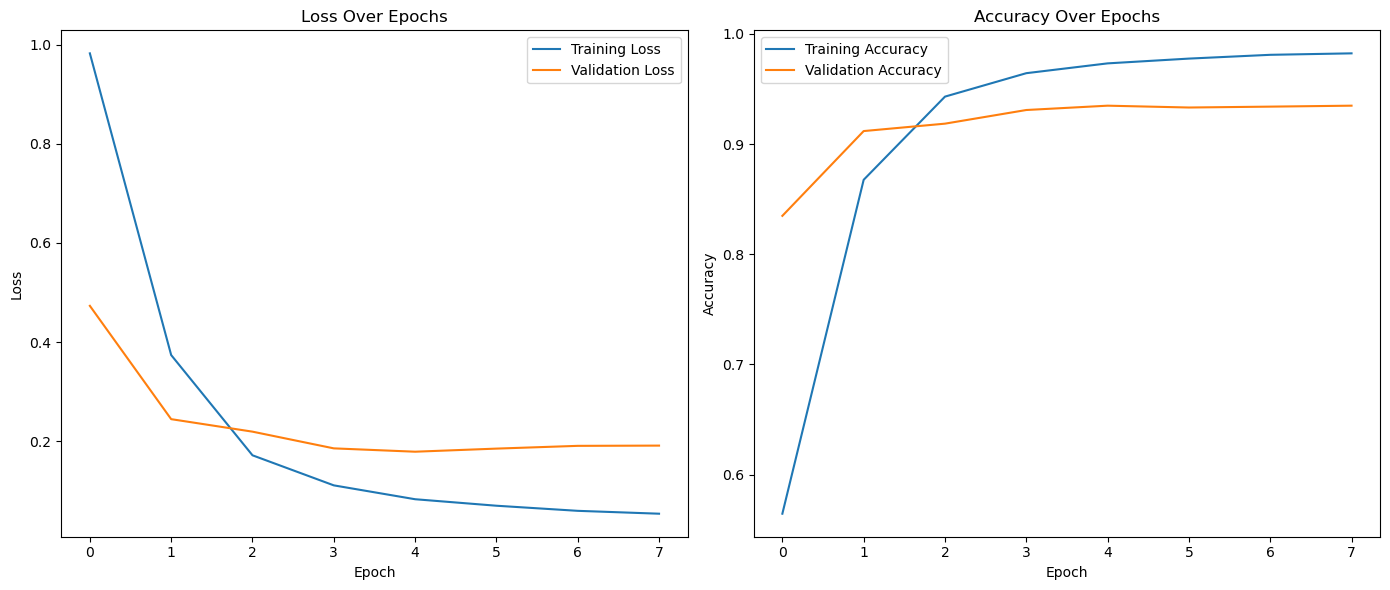

In [90]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

4381/4381 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step


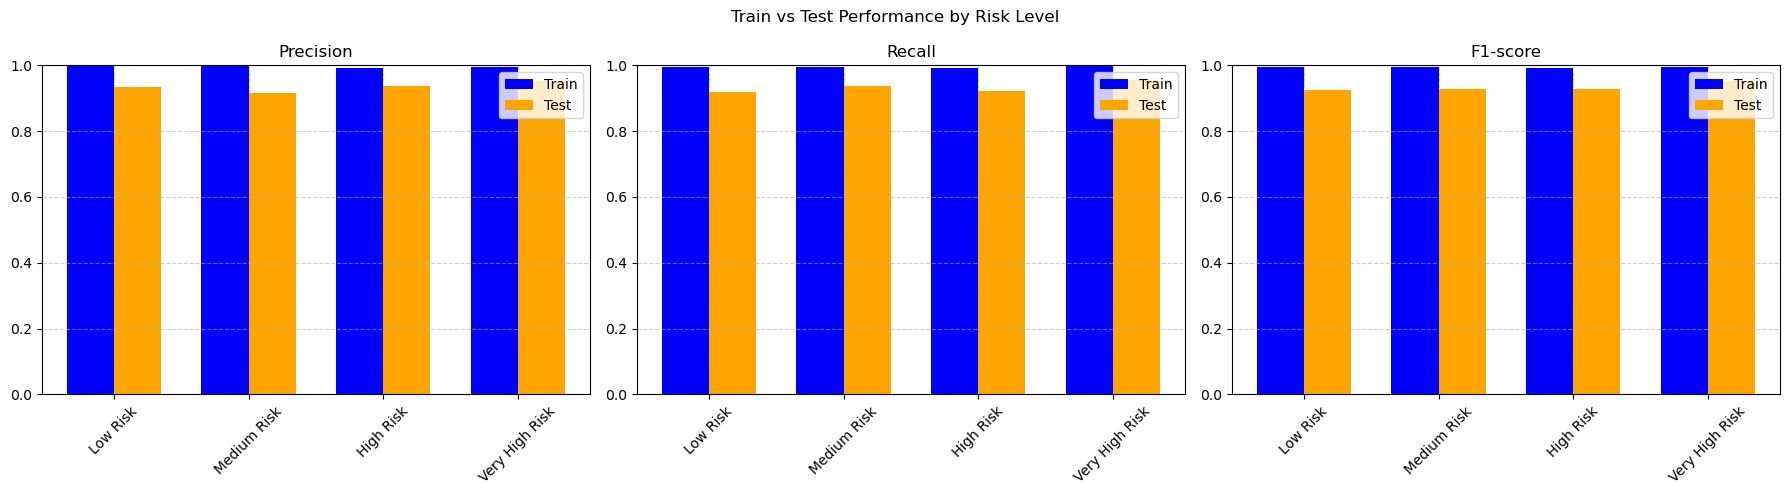

In [91]:
categories = ['Low Risk', 'Medium Risk', 'High Risk', 'Very High Risk']

y_train_pred_prob = model.predict(X_train)
y_train_pred = np.argmax(y_train_pred_prob, axis=1)

if y_train.ndim > 1:
    y_train_true = np.argmax(y_train, axis=1)
else:
    y_train_true = y_train

if y_train_pred.ndim > 1:
    y_train_pred = np.argmax(y_train_pred, axis=1)

train_report = classification_report(y_train_true, y_train_pred, target_names=categories, output_dict=True)
test_report = classification_report(y_test_true, y_test_pred, target_names=categories, output_dict=True)

metrics = ['precision', 'recall', 'f1-score']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, metric in enumerate(metrics):
    train_scores = [train_report[cat][metric] for cat in categories]
    test_scores = [test_report[cat][metric] for cat in categories]

    x = np.arange(len(categories))
    width = 0.35

    axes[i].bar(x - width/2, train_scores, width, label='Train', color='blue')
    axes[i].bar(x + width/2, test_scores, width, label='Test', color='orange')
    axes[i].set_title(metric.capitalize())
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(categories, rotation=45)
    axes[i].legend()
    axes[i].set_ylim(0, 1)
    axes[i].grid(True, linestyle='--', alpha=0.6)

plt.suptitle('Train vs Test Performance by Risk Level')
plt.tight_layout()
plt.show()